In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
result=pd.read_csv("gender_submission.csv")

In [3]:
train.shape #shape of the data

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
for col in train.columns:
    print(col,":",len(train[col].unique()))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 148
Embarked : 4


In [7]:
!pip install  pandas-profiling

In [8]:
%%capture
import pandas_profiling as pp

In [11]:
!pip install --user pycaret

  Using cached pycaret-2.0-py3-none-any.whl (255 kB)
  Using cached wordcloud-1.7.0-cp37-cp37m-win_amd64.whl (157 kB)
  Using cached xgboost-1.1.1-py3-none-win_amd64.whl (54.4 MB)
  Using cached kmodes-0.10.2-py2.py3-none-any.whl (18 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Processing c:\users\koh matsumoto\appdata\local\pip\cache\wheels\e1\27\13\3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0\cufflinks-0.17.3-py3-none-any.whl
  Using cached spacy-2.3.2-cp37-cp37m-win_amd64.whl (9.3 MB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached datefinder-0.7.1-py2.py3-none-any.whl (10 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Using cached mlxtend-0.17.3-py2.py3-none-any.whl (1.3 MB)
Processing c:\users\koh matsumoto\appdata\local\pip\cache\wheels\14\9a\ed\66159a5e13d3b6341b6542cf4f1faf478834753bed5ecaef8d\umap_learn-0.4.6-py3-none-any.whl
  Using cached mlflow-1.10.0-py3-none-any.whl (12.4 MB)
  Using ca

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [12]:
from pycaret.classification import *

In [13]:
clf = setup(data = train, target = 'Survived',train_size=0.7,numeric_imputation='mean',categorical_imputation='mode',feature_selection=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,1585
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8316,0.8684,0.6489,0.8846,0.7440,0.6240,0.6435,6.5791
1,Gradient Boosting Classifier,0.8299,0.8650,0.6447,0.8847,0.7423,0.6206,0.6403,1.3301
2,Ridge Classifier,0.8298,0.0000,0.7286,0.8163,0.7647,0.6327,0.6398,0.1209
3,Light Gradient Boosting Machine,0.8267,0.8636,0.7197,0.8114,0.7604,0.6258,0.6306,0.1446
4,Extra Trees Classifier,0.8235,0.8670,0.6616,0.8560,0.7393,0.6101,0.6268,0.3860
5,Decision Tree Classifier,0.8186,0.7966,0.7029,0.8051,0.7470,0.6069,0.6133,0.0655
6,Logistic Regression,0.8123,0.8685,0.7076,0.7848,0.7392,0.5942,0.6001,0.2725
7,Ada Boost Classifier,0.8108,0.8575,0.6699,0.8078,0.7282,0.5859,0.5950,0.8114
8,Extreme Gradient Boosting,0.8107,0.8560,0.7072,0.7819,0.7402,0.5923,0.5962,2.8305
9,Random Forest Classifier,0.7994,0.8417,0.5978,0.8399,0.6922,0.5506,0.5721,0.1378


In [16]:
gradientboost_model=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8948,0.5833,0.9333,0.7179,0.6010,0.6359
1,0.7460,0.8216,0.4583,0.7857,0.5789,0.4146,0.4455
2,0.8730,0.8905,0.6667,1.0000,0.8000,0.7123,0.7438
3,0.7903,0.8843,0.6667,0.7619,0.7111,0.5477,0.5507
4,0.8710,0.8695,0.7917,0.8636,0.8261,0.7238,0.7256
5,0.8065,0.8399,0.6250,0.8333,0.7143,0.5724,0.5860
6,0.8226,0.9117,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.8548,0.8240,0.6250,1.0000,0.7692,0.6714,0.7109
8,0.8226,0.8372,0.6250,0.8824,0.7317,0.6049,0.6249
9,0.8871,0.8763,0.7391,0.9444,0.8293,0.7468,0.7593


In [17]:
tuned_model=tune_model(gradientboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8868,0.5000,0.9231,0.6486,0.5202,0.5692
1,0.7460,0.8328,0.4167,0.8333,0.5556,0.4043,0.4519
2,0.8254,0.8996,0.6250,0.8824,0.7317,0.6078,0.6277
3,0.7742,0.8624,0.6667,0.7273,0.6957,0.5167,0.5179
4,0.8548,0.8761,0.6667,0.9412,0.7805,0.6767,0.6992
5,0.8387,0.8909,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.8387,0.9243,0.7083,0.8500,0.7727,0.6493,0.6558
7,0.8387,0.8174,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8226,0.8805,0.5833,0.9333,0.7179,0.5984,0.6335
9,0.8226,0.8763,0.6957,0.8000,0.7442,0.6094,0.6129


In [18]:
# ensemble tuned Gradient Boost model 
ensembled_gbm = ensemble_model(tuned_model,method='Boosting')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8777,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.7460,0.8408,0.4583,0.7857,0.5789,0.4146,0.4455
2,0.8413,0.8932,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.7742,0.8750,0.6667,0.7273,0.6957,0.5167,0.5179
4,0.8226,0.8596,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8387,0.8706,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.8548,0.9375,0.7500,0.8571,0.8000,0.6869,0.6906
7,0.8548,0.8289,0.6667,0.9412,0.7805,0.6767,0.6992
8,0.8065,0.8893,0.5833,0.8750,0.7000,0.5654,0.5908
9,0.8871,0.8829,0.7826,0.9000,0.8372,0.7514,0.7557


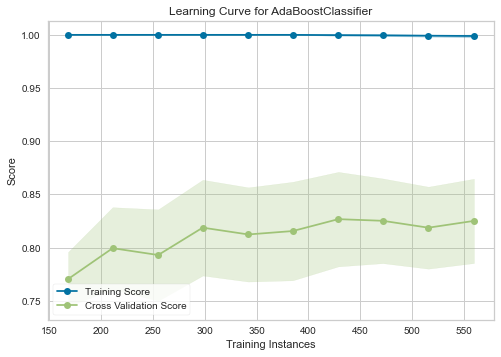

In [19]:
plot_model(ensembled_gbm,plot='learning')

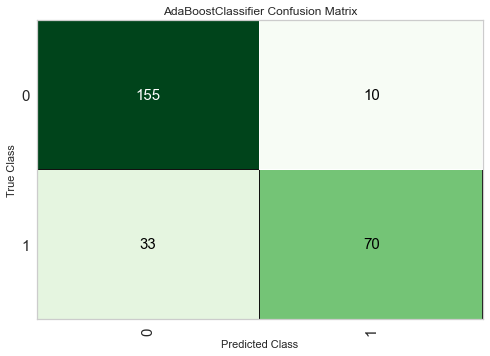

In [20]:
plot_model(ensembled_gbm,plot='confusion_matrix')

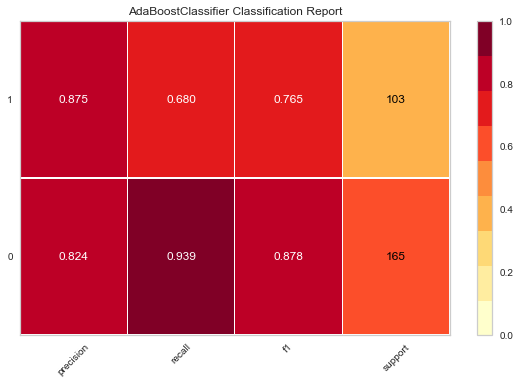

In [21]:
plot_model(ensembled_gbm,plot='class_report')

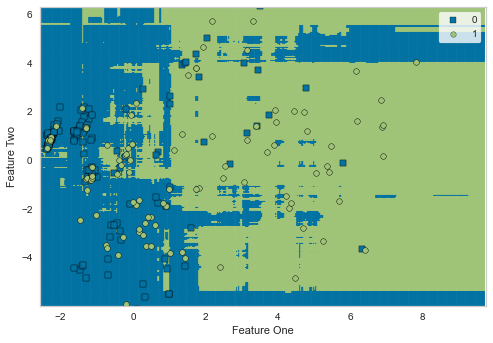

In [22]:
plot_model(ensembled_gbm,plot='boundary')

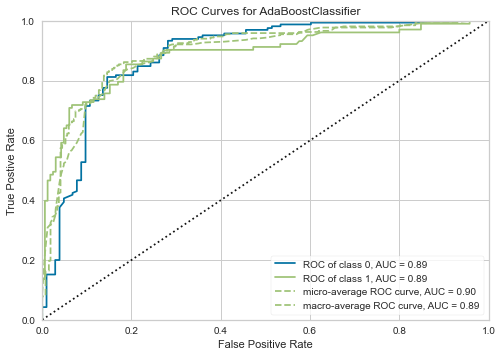

In [23]:
plot_model(ensembled_gbm,plot='auc')

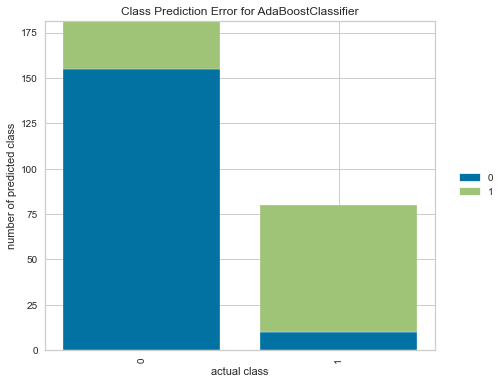

In [24]:
plot_model(ensembled_gbm,plot='error')

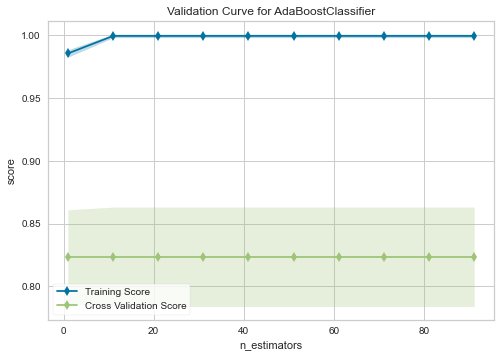

In [25]:
plot_model(ensembled_gbm,plot='vc')

In [26]:
evaluate_model(ensembled_gbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(ensembled_gbm,data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1876
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3585
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.2344
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1845
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1832
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.8711
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.1607
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1832


In [28]:
predict_model(ensembled_gbm,data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1876
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3585
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.2344
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1845
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1832
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.8711
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.1607
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1832


In [30]:
predictions = predict_model(ensembled_gbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1876
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.3585
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.2344
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1845
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4998


In [31]:
result['Survived'] = round(predictions['Score']).astype(int)
result.to_csv('Submission.csv',index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [32]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
